# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  92: Forward and Backward Propogation - Utkarsh Gaikwad</p>

[Assignment pdf link](./Forward%20&%20Backward%20Propagation%20(1).pdf)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 1</p>

## Q1: What is the purpose of forward propagation in a neural network?
---

## Answer :

### The purpose of forward propagation in a neural network is to compute the output of the network for a given input data point. It is the process of transmitting the input data through the network's layers in a sequential manner, from the input layer to the output layer, to obtain the predicted output or activation of the final layer.

### Forward propagation involves several key steps:

1. `Input Layer`: The input data is fed into the neural network's input layer. Each node in the input layer represents a feature or attribute of the input data.

2. `Weighted Sum and Activation`: In each hidden layer and the output layer, the input from the previous layer is multiplied by a set of weights, and then a bias term is added. The weighted sum is passed through an activation function to introduce non-linearity into the model. This activation function is typically a nonlinear function like ReLU (Rectified Linear Unit), Sigmoid, or Tanh.

3. `Passing through Layers`: The data flows through the layers of the neural network, with each layer processing the output of the previous layer until it reaches the output layer.

4. `Output Layer`: The final layer of the neural network generates the predicted output based on the processed information from the previous layers.

5. `Loss Calculation`: Once the output is obtained, it is compared to the actual target values of the training data, and a loss function is used to measure the error between the predicted output and the true target.

### The forward propagation process is the foundation for learning in neural networks, as it allows the network to generate predictions based on its current parameters. During training, the weights and biases are updated in a process called backpropagation, where the error is propagated backward through the network to adjust the model's parameters and reduce the prediction error over time.

### By iteratively updating the model's parameters through forward and backward passes (forward propagation and backpropagation), the neural network learns to make better predictions and eventually converges to an optimal set of weights and biases, enabling it to make accurate predictions on new, unseen data.

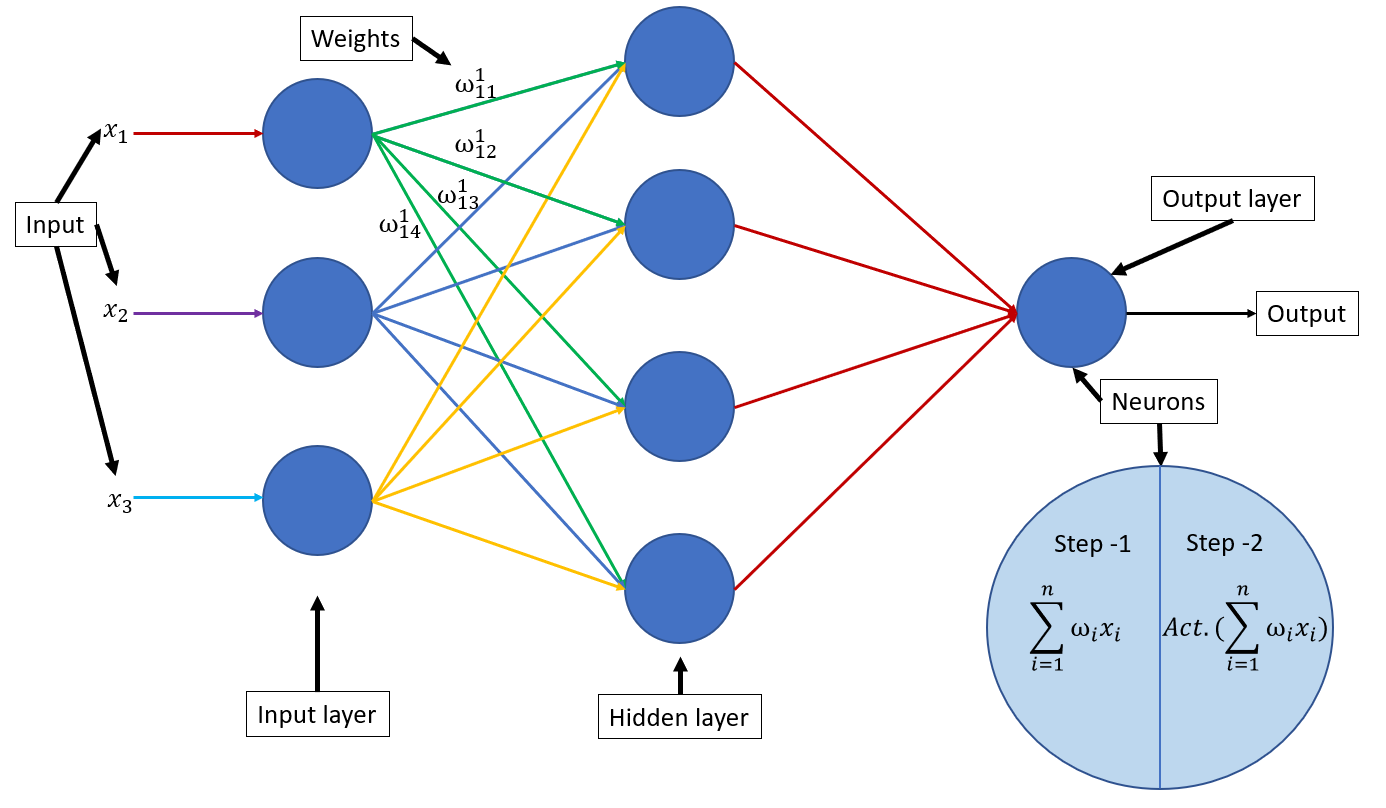

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 2</p>

## Q2: How is forward propagation implemented mathematically in a single-layer feedforward neural network?
---

## Answer:

### In a single-layer feedforward neural network, also known as a perceptron, there is only one hidden layer between the input and output layers. The mathematical implementation of forward propagation in such a network involves the following steps:

1. `Input Layer`:
Let's assume the input data has 'n' features, and we represent the input as a vector x ∈ ℝ^n.

2. `Weights and Biases`:
The single hidden layer has 'm' neurons (also called nodes or units). For each neuron in the hidden layer, there will be 'n' weights (one weight for each input feature), and there will be 'm' bias terms (one for each neuron in the hidden layer). We can represent the weights as a matrix W ∈ ℝ^(m x n), where each row corresponds to the weights of a neuron, and the biases as a vector b ∈ ℝ^m.

3. `Weighted Sum and Activation`:
The weighted sum for each neuron in the hidden layer can be computed as follows:
z = W * x + b
Here, 'z' is a vector of size 'm', representing the weighted sum for each neuron.
Next, we apply an activation function 'f' element-wise to the 'z' vector to introduce non-linearity into the model. Common activation functions include ReLU (Rectified Linear Unit), Sigmoid, and Tanh. For example, using ReLU as the activation function, the output of the hidden layer would be:
a = ReLU(z)
where 'a' is a vector of size 'm', representing the activations of the hidden layer.

4. `Output Layer`:
In a single-layer feedforward neural network, the output layer typically consists of just one neuron (for regression problems) or a neuron for each class (for classification problems). We'll use the sigmoid activation function for this output neuron. The output 'y_hat' of the neural network is obtained as:
y_hat = sigmoid(w * a + b_output)
where 'w' is a weight vector for the output neuron, and 'b_output' is the bias term.
The 'sigmoid' function is used to squash the output into the range (0, 1) for binary classification problems, while for regression tasks, it can output continuous values within (0, 1).

### These are the main mathematical steps for forward propagation in a single-layer feedforward neural network. The network takes the input data, applies the weights and biases in the hidden layer, activates the hidden layer neurons, and then computes the final output using the output layer neuron and the sigmoid activation function. The output 'y_hat' represents the prediction of the neural network for the given input 'x'.

### Below is forward propogation implementation from scratch

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement forward propagation with a single-layer neural network
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, weights, biases):
    # Compute the weighted sum and activation for the hidden layer
    z_hidden = np.dot(X, weights.T) + biases[0]
    a_hidden = sigmoid(z_hidden)
    
    # Compute the weighted sum and activation for the output layer
    z_output = np.dot(a_hidden, weights_output) + biases[1]
    y_hat = sigmoid(z_output)
    
    return y_hat

# Initialize random weights and biases for the hidden and output layers
np.random.seed(42)
num_features = X_train.shape[1]
num_hidden_units = 5
weights_hidden = np.random.randn(num_hidden_units, num_features)
biases_hidden = np.random.randn(num_hidden_units)
weights_output = np.random.randn(num_hidden_units)
bias_output = np.random.randn()

# Perform forward propagation on the training set
y_train_pred = forward_propagation(X_train, weights_hidden, [biases_hidden, bias_output])

# Perform forward propagation on the testing set
y_test_pred = forward_propagation(X_test, weights_hidden, [biases_hidden, bias_output])

# Use threshold value of 0.5 for predictions
thr = 0.5
y_test_pred_binary = []
for i in y_test_pred:
    if i>=thr:
        y_test_pred_binary.append(1)
    else:
        y_test_pred_binary.append(0)

# Print the binary predictions on the testing set
print('Probabilitues in testing set :')
print(y_test_pred)
print("\nBinary predictions on the testing set:")
print(y_test_pred_binary)

Probabilitues in testing set :
[0.22345511 0.23985097 0.27285123 0.29062651 0.21170418 0.17797046
 0.24349205 0.19444009 0.35483019 0.24122767 0.24886153 0.33902764
 0.28672947 0.3584103  0.23516385 0.17228751 0.30903937 0.35725155
 0.34074954 0.25310968 0.2599508  0.18962746 0.19881247 0.20016001
 0.30892669 0.28922213 0.21552498 0.23862251 0.309327   0.17259861
 0.31070321 0.19657821 0.2383344  0.2511316  0.21107557 0.24575929
 0.24884764 0.22912015 0.22379496 0.22567889 0.20611654 0.23399067
 0.2791439  0.2699759  0.29216922 0.2893002  0.17700586 0.1762776
 0.29467464 0.19442956 0.25691959 0.2626645  0.149085   0.31469157
 0.21605702 0.24897503 0.24466276 0.30885328 0.26331944 0.17841981
 0.25560665 0.24119622 0.32343265 0.2639401  0.29106528 0.23579575
 0.2019402  0.19927976 0.2619786  0.20206876 0.25993124 0.38010409
 0.26179328 0.17004308 0.24534204 0.12521227 0.28681918 0.2491174
 0.29864748 0.31639344 0.24416168 0.26173868 0.17618836 0.30239304
 0.26212449 0.26823453 0.21369024

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>

## Q3: How are activation functions used during forward propagation?
---

## Answer :

Activation functions are an essential component of forward propagation in neural networks. They introduce non-linearity into the model, allowing neural networks to approximate complex relationships between inputs and outputs. During forward propagation, the activation function is applied to the weighted sum of the inputs in each neuron to produce the activation or output of that neuron. Here's how activation functions are used during forward propagation:

1. `Weighted Sum Calculation`:
In forward propagation, the input data from the previous layer is multiplied by a set of weights for each neuron in the current layer. The weighted sum also includes a bias term. Mathematically, the weighted sum 'z' for a neuron 'i' in layer 'l' can be represented as follows:

$$ z_i^l = \sum_{j=1}^{N} (w_{ij}^l * a_j^{l-1}) + b_i^l $$


Here, 'weights_i_j' represents the weight connecting neuron 'i' in layer 'l' to neuron 'j' in the previous layer 'l-1', 'a_j^(l-1)' is the activation of neuron 'j' in layer 'l-1', and 'bias_i' is the bias term for neuron 'i' in layer 'l'.

2. `Activation Function Application`:
Once the weighted sum 'z' is computed for each neuron in the current layer, the activation function is applied element-wise to the 'z' vector to produce the activations 'a' for the current layer. The activations of the neurons become the input for the next layer in the forward propagation process.

Mathematically, for a single neuron, the activation 'a' can be calculated as:

a = activation_function(z)

Different activation functions can be used, and the choice of activation function depends on the type of problem and the specific characteristics of the data. Commonly used activation functions include:

- Sigmoid Function: sigmoid(z) = 1 / (1 + exp(-z))
- Hyperbolic Tangent Function (Tanh): tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))
- Rectified Linear Unit (ReLU): relu(z) = max(0, z)
- Leaky Rectified Linear Unit (Leaky ReLU): leaky_relu(z) = max(α * z, z), where α is a small positive constant (e.g., 0.01)
- Parametric Rectified Linear Unit (PReLU): prelu(z) = max(α * z, z), but α is a learnable parameter during training

### Each activation function introduces non-linearity, allowing neural networks to model complex relationships and capture more sophisticated patterns in the data. The choice of activation function can impact the network's performance, training speed, and ability to generalize to new data. Experimenting with different activation functions is a common practice when designing and training neural networks.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Q4: What is the role of weights and biases in forward propagation?
---

## Answer:

### In forward propagation, weights and biases play a crucial role in determining how the input data is processed through the neural network's layers to produce the final output. Let's understand the roles of weights and biases in detail:

1. `Weights`:
Weights are parameters in a neural network that determine the strength of connections between neurons in different layers. Each neuron in a given layer is connected to every neuron in the previous layer through these weights. During forward propagation, the input data is multiplied element-wise by the weights, and the result is used to compute the weighted sum for each neuron in the current layer.

    The weights control how much influence each input has on the neuron's activation in the subsequent layer. By adjusting the weights, the neural network can learn to capture patterns and relationships within the data. During the training process, the network updates the weights through backpropagation, aiming to minimize the difference between the predicted output and the actual target.

2. `Biases`:
Biases are additional parameters in a neural network that allow the model to introduce shifts or offsets in the activation of neurons. Each neuron in a layer has its own bias term, which is added to the weighted sum of inputs before passing through an activation function.

    Biases help in fine-tuning the model and allowing it to learn different patterns even when the input values are zero. Without biases, the neurons' activations would be limited to a linear transformation of the input data. The bias terms enable the network to model more complex relationships and make the model more flexible in fitting the training data.

### In summary, the weights and biases in a neural network serve as learnable parameters that control how information flows through the network during forward propagation. They enable the network to transform the input data and produce meaningful representations in each layer, eventually leading to the model's output. Properly adjusting the weights and biases during training is crucial for the neural network to learn and generalize well on new, unseen data.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Q5. What is the purpose of applying a softmax function in the output layer during forward propagation?
---

## Answer :

### The purpose of applying a softmax function in the output layer during forward propagation is to convert the raw scores or logits of each class into probabilities. The softmax function is commonly used in multi-class classification problems, where the neural network needs to predict the probability distribution over multiple classes.

### In the output layer of a neural network, after computing the weighted sum of inputs and applying an activation function (such as ReLU or Tanh) to get the activations, we have the final layer activations. These activations are often referred to as logits, and they represent the unnormalized scores for each class. The larger the logit for a particular class, the more the neural network believes that the input belongs to that class.

### However, logits are not directly interpretable as probabilities since they can take any real value, positive or negative. To convert these logits into probabilities that sum up to 1, we use the softmax function. The softmax function applies the exponential function to each logit and normalizes the results by dividing each exponential value by the sum of all exponential values. Mathematically, for a vector of logits 'z', the softmax function is defined as:

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $$


### where 'exp' denotes the exponential function and 'sum' is the sum over all elements of the vector 'z'.

### By applying the softmax function, the neural network's output becomes a probability distribution over all the classes. Each element of the output vector represents the probability that the input belongs to the corresponding class. The class with the highest probability is then chosen as the predicted class during inference.

### In summary, the softmax function is used in the output layer during forward propagation to convert logits into probabilities, making it easier to interpret the model's confidence in predicting each class and facilitating multi-class classification tasks.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 6</p>

## Q6: What is the purpose of backward propagation in a neural network?
---

## Answer :

### The purpose of backward propagation, also known as backpropagation, in a neural network is to update the model's parameters (weights and biases) based on the calculated gradients of the loss function with respect to those parameters. Backpropagation is a critical step in the training process of a neural network and is used to minimize the error or loss between the predicted output and the actual target.

### During forward propagation, the input data is fed through the neural network, and the model computes the output. The loss function then measures how well the model's predictions match the true target values. Backpropagation allows the network to learn from its mistakes and update its parameters to reduce the prediction error. Here's how it works:

1. `Forward Propagation`: During forward propagation, the input data passes through the layers of the neural network, and the output is computed based on the current values of the weights and biases.

2. `Loss Calculation` The loss function compares the predicted output with the true target values, measuring the discrepancy between them. Common loss functions include mean squared error (MSE) for regression tasks and cross-entropy loss for classification tasks.

3. `Backward Propagation`: In backpropagation, the gradients of the loss function with respect to the model's parameters (weights and biases) are calculated. This is done using the chain rule of calculus, which enables the computation of how changes in each parameter affect the overall loss.

4. `Parameter Updates`: With the gradients available, the network updates its parameters to minimize the loss function. The weights and biases are adjusted in the direction that reduces the loss, using optimization techniques like stochastic gradient descent (SGD), Adam, or RMSprop.

5. `Iterative Process`: The entire forward-backward process is repeated iteratively through multiple epochs until the model converges to an optimal set of parameters that minimize the loss and make accurate predictions.

### By propagating the error from the output layer backward through the network and adjusting the weights and biases accordingly, the neural network learns to improve its predictions and make better representations of the data. Backpropagation enables the network to efficiently learn complex patterns and relationships in the data, allowing it to generalize well on new, unseen inputs.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 7</p>

## Q7 : How is backward propagation mathematically calculated in a single-layer feedforward neural network?
---

## Answer :

### In a single-layer feedforward neural network, also known as a perceptron, the backward propagation process involves computing the gradients of the loss function with respect to the model's parameters (weights and biases). These gradients represent the sensitivity of the loss function to changes in the model's parameters and guide the optimization algorithm in updating the parameters to minimize the loss.

### Let's break down the mathematical steps for backward propagation in a single-layer feedforward neural network:

1. `Loss Function`:
The loss function measures the discrepancy between the predicted output and the true target values. For a binary classification problem, we can use the cross-entropy loss function:

$ L = -[y_{true} * log(a_{output}) + (1 - y_{true}) * log(1 - a_{output})] $

where 'y_true' is the true target value (0 or 1), and 'a_output' is the output activation of the output neuron after applying the activation function (e.g., sigmoid) to the weighted sum.

2. `Compute Output Error (Gradient at the Output Layer)`:
The gradient of the loss function 'L' with respect to the output 'a_output' can be computed as follows:

$ \frac{\partial L}{\partial a_{output}} = \frac{a_{output} - y_{true}}{a_{output} (1 - a_{output})} $

3. Compute Gradients at the Hidden Layer:
The gradient of the loss function 'L' with respect to the weights 'W_hidden' and biases 'b_output' can be calculated as:

$ \frac{\partial L}{\partial W_{hidden}} = \frac{\partial L}{\partial a_{output}} \frac{\partial a_{output}}{\partial z_{output}} \frac{\partial z_{output}}{\partial W_{hidden}}$

$ \frac{\partial L}{\partial b_{output}} = \frac{\partial L}{\partial a_{output}} \frac{\partial a_{output}}{\partial z_{output}} $

4. `Parameter Update`:
Finally, the gradients are used to update the model's parameters (weights and biases) during the optimization step, typically using an optimization algorithm like stochastic gradient descent (SGD) or its variants.

### Please note that the above explanation and equations assume a binary classification problem and a single output neuron. In more complex scenarios or multi-class classification problems, the equations and gradients may vary accordingly. Additionally, in real-world scenarios, libraries like TensorFlow or PyTorch handle the computation of gradients automatically during backpropagation, so you do not need to calculate them manually.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 8</p>

## Q8 : Can you explain the concept of the chain rule and its application in backward propagation?
---

## Answer :

### The chain rule is a fundamental concept in calculus that allows us to compute the derivative of a composite function. In the context of neural networks and backward propagation, the chain rule is a crucial mathematical tool for calculating gradients and propagating errors from the output layer back through the network to update the model's parameters (weights and biases).

### Let's understand the chain rule and its application in backward propagation step-by-step:

1. `Chain Rule`:
The chain rule states that the derivative of a composite function is the product of the derivatives of its individual functions. If we have a composite function 'f(g(x))', where 'f' and 'g' are functions, then the chain rule can be expressed as:

$ \frac{\partial f(g(x))}{\partial x} = \frac{\partial f(g(x))}{\partial g(x)} \cdot \frac{\partial g(x)}{\partial x}  $

In the context of neural networks, we often have complex functions with multiple layers and activation functions. The chain rule allows us to compute the gradients of these functions with respect to the model's parameters by breaking down the computation into smaller, manageable steps.

2. `Backward Propagation and Chain Rule Application`:
Backward propagation, also known as backpropagation, is the process of computing gradients of the loss function with respect to the model's parameters. It starts at the output layer and works backward through the network to compute gradients at each layer and update the parameters.

### During backward propagation, the chain rule is applied to compute the gradients layer-by-layer. Here's how it works:

a. Output Layer:
Starting at the output layer, we compute the gradient of the loss function with respect to the output of the neural network (often referred to as logits). Let's denote this gradient as $ \frac{\partial L}{\partial \text{logits}} $.

b. Activation Function:
Next, we apply the derivative of the activation function at the output layer to get the gradient with respect to the weighted sum at the output layer (often denoted as 'z_output').

c. Weights and Biases at Output Layer:
Using the gradient with respect to the weighted sum, we can then compute the gradients of the loss function with respect to the weights and biases at the output layer.

d. Hidden Layers:
We then move backward through the network to the hidden layers. At each hidden layer, we apply the derivative of the activation function to the weighted sum to get the gradient with respect to the activations of the neurons in that layer.

e. Weights and Biases at Hidden Layers:
Using the gradients with respect to the activations, we can compute the gradients of the loss function with respect to the weights and biases at each hidden layer.

### By applying the chain rule at each layer, we efficiently compute the gradients of the loss function with respect to the model's parameters, allowing us to update the parameters and minimize the loss during the optimization process.

### In summary, the chain rule plays a vital role in backward propagation as it enables the computation of gradients layer-by-layer, facilitating the training of neural networks by updating their parameters to minimize the loss function and improve prediction accuracy.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 9</p>

## Q9 : What are some common challenges or issues that can occur during backward propagation, and how can they be addressed?
---

## Answer :

### During backward propagation in neural networks, several challenges or issues can arise, which can affect the training process and the model's performance. Here are some common challenges and potential solutions to address them:

1. `Vanishing or Exploding Gradients`:
Issue: In deep neural networks, gradients can become very small (vanishing gradients) or very large (exploding gradients) as they are propagated backward through the layers. This can lead to slow convergence or instability during training.

   Solution: Several techniques can mitigate vanishing or exploding gradients:
   - Weight Initialization: Proper initialization of weights can help prevent extreme gradients. Techniques like Xavier/Glorot initialization and He initialization are commonly used.
   - Gradient Clipping: Limiting the magnitude of gradients during training can prevent exploding gradients. This involves scaling the gradients when they exceed a certain threshold.
   - Batch Normalization: Batch normalization can stabilize training by normalizing the activations within each batch, reducing internal covariate shift.

2. `Overfitting`:
Issue: Overfitting occurs when the model becomes too specialized to the training data and performs poorly on unseen data.

   Solution: Several methods can be employed to tackle overfitting:
   - Regularization: Techniques like L1 and L2 regularization can be used to penalize large weights and prevent overfitting.
   - Dropout: Dropout randomly deactivates neurons during training, preventing co-adaptation and overfitting.
   - Data Augmentation: Increasing the size of the training dataset through data augmentation can help the model generalize better.
   - Early Stopping: Monitoring the validation loss and stopping training when it starts to increase can prevent overfitting.

3. `Learning Rate Selection`:
Issue: Choosing an appropriate learning rate is critical for successful training. A learning rate that is too high may cause the optimization process to overshoot the minimum, while a learning rate that is too low may result in slow convergence.

   Solution: Learning rate scheduling and tuning can help find an optimal learning rate during training. Techniques like learning rate decay, cyclical learning rates, or adaptive learning rate algorithms (e.g., Adam) can be used.

4. `Local Minima`:
Issue: The optimization process may get stuck in local minima, preventing the model from reaching the global minimum of the loss function.

   Solution: While local minima can be an issue in theory, in practice, they are not a significant problem due to the high dimensionality of neural networks. Modern optimization algorithms and random weight initialization generally help avoid getting trapped in poor local minima.

5. `Computational Efficiency`:
Issue: Backward propagation can be computationally expensive, especially in deep networks or with large datasets.

   Solution: Optimizations like mini-batch gradient descent and parallel processing can be used to improve computational efficiency. Additionally, using GPU or TPU hardware accelerators can significantly speed up the training process.

6. `Gradient Descent Variants and Hyperparameters`:
Issue: Different optimization algorithms (e.g., SGD, Adam) and their hyperparameters can impact training performance.

   Solution: Experimenting with different optimization algorithms and hyperparameter values (e.g., learning rate, momentum) can help find the best configuration for a specific task and network architecture.

### In summary, addressing challenges during backward propagation involves a combination of architectural design choices, regularization techniques, learning rate tuning, and optimization algorithm selection. Neural network training often involves iterative experimentation to find the right balance between preventing issues like overfitting and vanishing/exploding gradients while achieving optimal convergence and generalization on the task at hand.